In [53]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FACTOR_DIR = 'D:/Data/factor'

# 读入数据

In [4]:
files = [f for f in os.listdir(FACTOR_DIR)]

In [6]:
dic = {}
for f in files:
    fname = '%s/%s'%(FACTOR_DIR, f)
    df = pd.read_excel(fname, index_col=0)
    dic[f[:9]] = df
pnl = pd.Panel(dic)

In [7]:
pnl

<class 'pandas.core.panel.Panel'>
Dimensions: 3137 (items) x 1133 (major_axis) x 3 (minor_axis)
Items axis: 000001.SZ to 603999.SH
Major_axis axis: 2012-10-08 00:00:00.005000 to 2017-06-06 00:00:00.005000
Minor_axis axis: close to volatility 1M

In [8]:
pnl.minor_axis

Index([u'close', u'caps', u'volatility 1M'], dtype='object')

In [24]:
pnl.ix[:, :, 'ret'] = pnl.minor_xs('close').pct_change()

In [25]:
ret_df = pnl.minor_xs('ret')

In [26]:
ret_df.tail()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
2017-05-31 00:00:00.005,0.010989,0.034550,0.0,0.003861,-0.008274,0.0,-0.008392,0.004098,0.014257,0.003361,...,-0.006678,-0.011971,0.006194,0.064865,0.011432,-0.004728,-0.016166,-0.018455,0.000000,-0.005079
2017-06-01 00:00:00.005,-0.001087,-0.007996,0.0,-0.023077,-0.021454,0.0,-0.012694,-0.012245,-0.054217,-0.008375,...,-0.072269,-0.031987,-0.012580,-0.072081,-0.076964,-0.033254,0.016432,0.000000,-0.021821,-0.045431
2017-06-02 00:00:00.005,-0.002176,-0.006638,0.0,0.005906,0.031669,0.0,0.015714,0.009642,0.050955,0.075450,...,0.042120,-0.004172,-0.014367,0.021335,0.029446,-0.007371,-0.005774,0.000000,0.021538,0.016043
2017-06-05 00:00:00.005,-0.015267,0.007160,0.0,0.000000,0.001181,0.0,0.001406,0.008186,-0.014141,-0.003665,...,0.015645,0.005195,0.000825,0.004821,0.067686,0.007426,-0.006969,0.000000,0.038404,0.018421
2017-06-06 00:00:00.005,0.001107,-0.010900,0.0,0.005871,0.005896,0.0,0.002809,0.005413,0.008197,0.018917,...,0.013693,-0.004668,0.000000,0.000267,0.026790,0.004914,0.005848,0.000000,0.000000,0.001550


In [161]:
def factor_return(ret_df, df, ascending=True, percent=0.1):
    '''
    计算因子收益率
    ret_df: 收益率矩阵
    df: 因子矩阵
    ascending: 因子从小到大
    percent: 取前百分比
    '''
    assert(ret_df.shape == df.shape)
    # 因子排序
    rdf = df.rank(axis=1, ascending=ascending, pct=True, method='first')
    rdf = rdf[rdf <= percent]
    factor_df = pd.Series(index=ret_df.index)
    for index in rdf.index:
        rank, ret = rdf.loc[index], ret_df.loc[index]
        # 取包含该因子的股票
        stocks = rank[~rank.isnull()].index
        # 计算股票集的平均收益率
#         print stocks
        factor_ret = ret[stocks].mean()
        factor_df.loc[index] = factor_ret
    return factor_df

# 市值因子（小市值）

In [111]:
df = pnl.minor_xs('caps')

In [112]:
factor_df = factor_return(ret_df, df)

In [113]:
cum_ret = (1 + factor_df).cumprod()

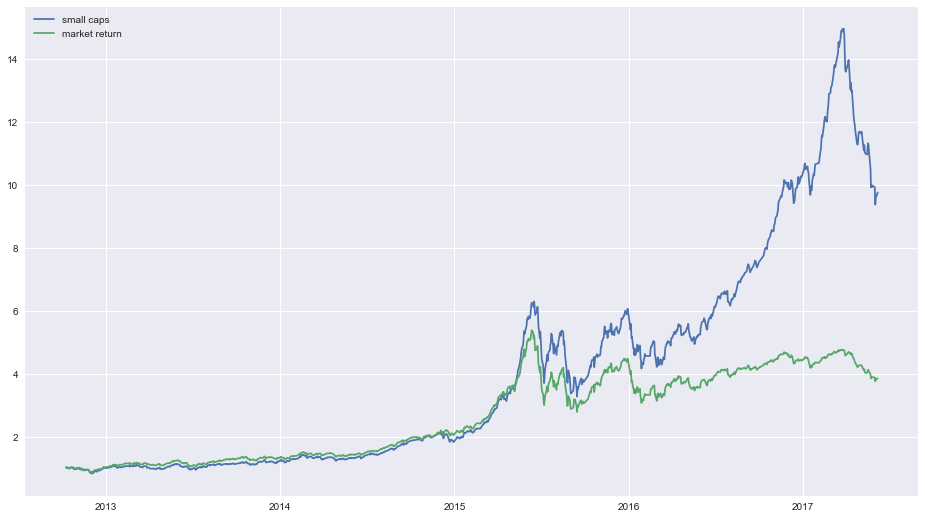

In [114]:
plt.figure(figsize=(16, 9))
plt.plot(cum_ret, label='small caps')
plt.plot((1+ret_df.mean(axis=1)).cumprod(), label='market return')
plt.legend()

# 市值因子（大市值）

In [115]:
df = pnl.minor_xs('caps')

In [116]:
factor_df = factor_return(ret_df, df, ascending=False, percent=0.01)

In [117]:
cum_ret = (1 + factor_df).cumprod()

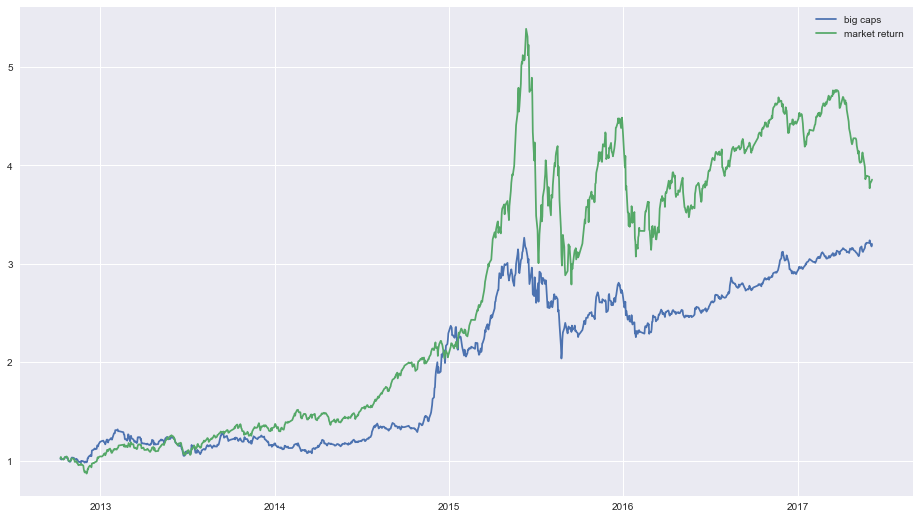

In [119]:
plt.figure(figsize=(16, 9))
plt.plot(cum_ret, label=u'big caps')
plt.plot((1+ret_df.mean(axis=1)).cumprod(), label='market return')
plt.legend()

# 波动率因子（一个月低波动率）

In [175]:
df = pnl.minor_xs('volatility 1M')

In [176]:
factor_df = factor_return(ret_df, df, percent=0.1)

In [177]:
cum_ret = (1 + factor_df).cumprod()

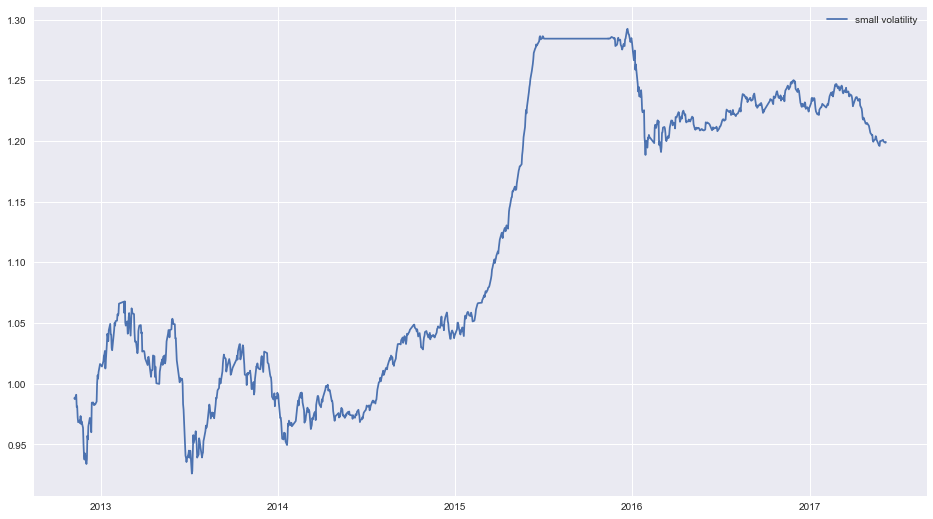

In [178]:
plt.figure(figsize=(16, 9))
plt.plot(cum_ret, label=u'small volatility')
# plt.plot((1+ret_df.mean(axis=1)).cumprod(), label='market return')
plt.legend()